In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

In [3]:
# find the path on your disk
pathName = r"C:\MyFiles\Dropbox\Teaching\Urban_Data_Analsysis\Fall 2020\Data\exam_scores.csv"

In [4]:
# read the csv as a dataframe
df = pd.read_csv(pathName)

In [5]:
df.sample(6)

,EthincityGroups,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,study_hours
51,group C,some high school,none,68,66,63,3
62,group C,some college,none,66,86,80,6
98,group C,some high school,completed,29,46,44,2
66,group E,high school,none,62,80,74,1
29,group D,associate's degree,none,75,82,91,8
61,group E,some college,none,66,64,65,5


# T test
### The differences between two groups (we need one categorical variable and one numerical variable)

In [11]:
# get the unique values of a categorical variable
df['test_preparation_course'].unique()

array(['completed', 'none'], dtype=object)

### Let's have a simple boxplot first

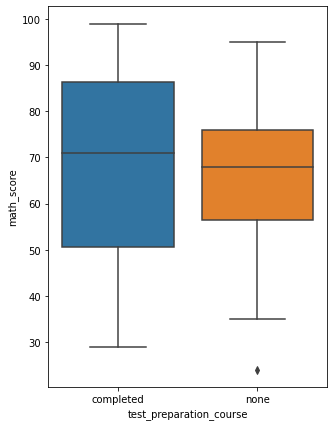

In [21]:
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(5, 7)
# plot
sns.boxplot(data=df, x='test_preparation_course', y='math_score');

In [ ]:
# use the unique values to split the dataframe and create two separate dataframes for each group.
df_group_1 = df[df['test_preparation_course']=='completed']
df_group_2 = df[df['test_preparation_course']=='none']

In [ ]:
# now we need to use statmodels and pass each group (with a column) as an argument
# the test returns:
## 1) tstat : test statistic
## 2) pvalue of the t-test
## 3) degrees of freedom used in the t-test
sm.stats.ttest_ind(df_group_1['math_score'],df_group_2['math_score'])

# One-way ANOVA
### differences between multiple groups: we need a categorical variable with more than two groups in it in addition to a numerical variable)

In [17]:
# let's see the mean and median of each group
grp = df.groupby('parental_level_of_education')
grp['math_score'].agg([np.median, np.mean])

,median,mean
parental_level_of_education,,
associate's degree,72.5,72.937500
bachelor's degree,73.0,71.333333
high school,61.0,56.307692
master's degree,75.0,70.454545
some college,70.5,68.437500
some high school,67.5,61.625000


#### let's plot the math score for the groups

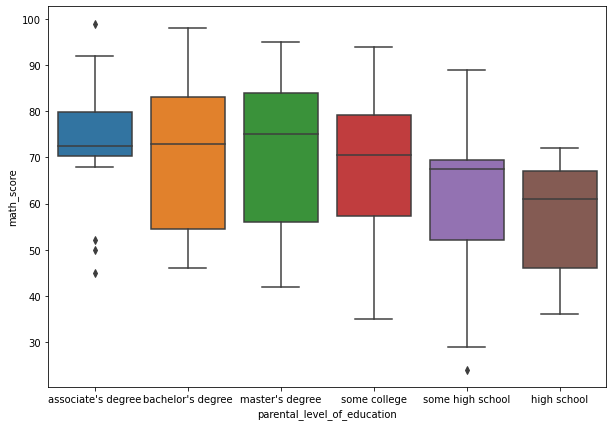

In [18]:
fig = plt.gcf()
# Changing Seaborn Plot size
fig.set_size_inches(10, 7)

sns.boxplot(data=df, x='parental_level_of_education', y='math_score');

In [12]:
# we need to pass the dataframe as the input. notice the syntax for columns
my_model = ols('math_score ~ parental_level_of_education', data = df).fit()
anova_table = sm.stats.anova_lm(my_model, typ=2)
# print the results
print(anova_table)

                                  sum_sq    df         F    PR(>F)
parental_level_of_education   2934.91433   5.0  2.286183  0.052239
Residual                     24134.72567  94.0       NaN       NaN


# post hoc tests

In [14]:
# effect size
import statsmodels.stats.multicomp as mc
comp = mc.MultiComparison(df['math_score'], df['parental_level_of_education'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
associate's degree,bachelor's degree,-1.6042,0.9,-19.4063,16.198,False
associate's degree,high school,-16.6298,0.0699,-34.0363,0.7767,False
associate's degree,master's degree,-2.483,0.9,-20.7416,15.7757,False
associate's degree,some college,-4.5,0.9,-18.7735,9.7735,False
associate's degree,some high school,-11.3125,0.3524,-27.7941,5.1691,False
bachelor's degree,high school,-15.0256,0.1877,-33.6873,3.6361,False
bachelor's degree,master's degree,-0.8788,0.9,-20.3378,18.5802,False
bachelor's degree,some college,-2.8958,0.9,-18.6757,12.8841,False
bachelor's degree,some high school,-9.7083,0.5949,-27.5105,8.0938,False
high school,master's degree,14.1469,0.2688,-4.9508,33.2445,False


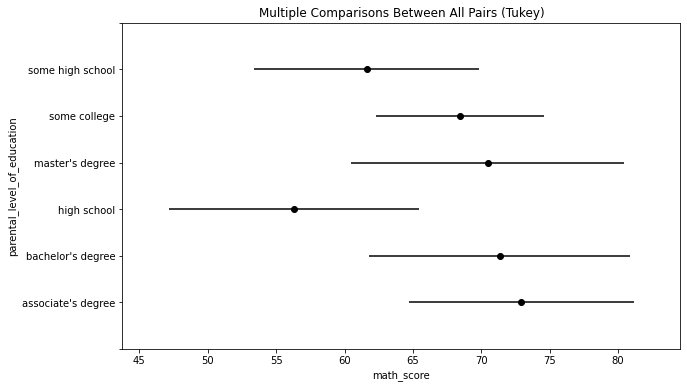

In [16]:
post_hoc_res.plot_simultaneous(ylabel= "parental_level_of_education", xlabel= "math_score");